# <p style="text-align: center;">_Part 0: Reading the data_</p>

ds is the abbreviation of dataset

In [1]:
ds=pd.read_excel(r'C:\Users\owner\Downloads\Fytlyff_DS_Interview.xlsx')

<IPython.core.display.Javascript object>

In [2]:
ds.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [3]:
# Print all the column names and the data types in each column. 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [4]:
# Print the cities of India from which the page was accessed
np.unique(ds['Place_in_India'], return_counts=True)

<IPython.core.display.Javascript object>

(array(['Bengaluru', 'Dehradun', 'Hyderabad', 'Indore', 'Pune'],
       dtype=object),
 array([432, 432, 432, 432, 432], dtype=int64))

In [5]:
# Which columns are having some values missing in them?
ds.isnull().sum()

Year                     0
Month                    0
Laptop/Desktop           0
Type_of_Customers?       0
Coming from              0
Place_in_India           0
Level 1               1079
Level 2               1079
Level 3                  0
Level 4                  0
dtype: int64

In [6]:
# Exract names of columns with nan values
ds.columns[ds.isnull().any()].tolist()

['Level 1', 'Level 2']

### ```Write a brief paragraph about what you think about this dataset along the lines of :```
 * **What type of company this dataset belongs to?**    
 This dataset belongs to some webiste analysis of 5 different cities, where it has been analysed that how many customers,
 whether existing or new, have visited the website from various/different sources and initiated/completed the activity present in website and then as per
 their actions Levels have been decided.

 * **Suppose that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level 1, 2, 3, 4 in the given dataset? Do you observe any pattern?**  
 Level 1: Customers who visited the website  
 Level 2: Customers clicked on the items  
 Level 3: Customers added items to their wishlist  
 Level 4: Customers who bought the items and made the payment
 

In [7]:
# Give the number of new customers who are from Pune and came from LinkedIn
ds[(ds['Place_in_India']=='Pune') & (ds['Coming from']=='Came_From_LinkedIn')]

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033
19,2020,Jan,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,383260.0,305902.0,172827,122285
34,2020,Jan,Laptop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,193520,40931
49,2020,Jan,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,480675.0,347596.0,186713,135275
64,2020,Feb,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,228051,36538
...,...,...,...,...,...,...,...,...,...,...
2089,2022,Nov,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,651079.0,366626.0,185650,110735
2104,2022,Dec,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,149418,36698
2119,2022,Dec,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,324090.0,168545.0,83423,56517
2134,2022,Dec,Laptop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,231012,40554


# <p style="text-align: center;">_Part 1: Data cleaning_</p>

#### ```2. Replaces the null values (if they exist) with the average of the respective column in the data```

In [8]:
ds['Level 1'] = ds['Level 1'].fillna(ds['Level 1'].mean())
ds['Level 2'] = ds['Level 2'].fillna(ds['Level 2'].mean())


In [9]:
ds.isnull().sum()

Year                  0
Month                 0
Laptop/Desktop        0
Type_of_Customers?    0
Coming from           0
Place_in_India        0
Level 1               0
Level 2               0
Level 3               0
Level 4               0
dtype: int64

#### ```1. Write a function called data_cleaning() which, when called, would perform the following activity:```
 * Create a column at the end, named “inc/dec percentage”, which would give the growth/reduction percentage  
 in numbers of level 1 vs level 4 columns.  
 Like, (“Level 1” – “Level 4”) / “Level 1” * 100


In [10]:
def data_cleaning(L1,L2):
    return (L1-L2) / L1 * 100

In [11]:
ds['inc/dec percentage']=data_cleaning(ds['Level 1'],ds['Level 4'])

In [12]:
ds.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


#### ```3. In column ‘B’ replace Jan with january, feb with february, march with march, apr with April and so on. Use the lambda function to do the same.```

In [13]:
from datetime import datetime
ds['Month']=ds['Month'].apply(lambda x: datetime.strptime(x,'%b').strftime('%B'))

In [14]:
ds.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


#### ```4. In column ‘E’ Replace “Came_From_LinkedIn” with “From LinkedIn” and “Landed_Directly” with “Direct_traffic” .```

In [15]:
ds['Coming from'].replace({'Came_From_LinkedIn':'From LinkedIn','Landed_Directly':'Direct_traffic'},inplace=True)


In [16]:
ds['Coming from'].value_counts()

From LinkedIn           720
Direct_traffic          720
Unidentified_Sources    720
Name: Coming from, dtype: int64

# <p style="text-align: center;">_Part 2: Descriptive statistics_</p>

#### Write a function called descriptive_stats(‘Year’, ‘Month’ , ‘Laptop/Desktop’ , ‘Type_of_Customers?’ , ‘Coming from’) which, when called, would perform the following activity:



#### ```1. Gives the minimum values present in all the level-columns. (Level 1, 2, 3, 4)```

In [17]:
def  descriptive_stats(year=2020,month='January',Laptop_Desktop='Desktop_Website',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        df=ds[(ds['Year']==year) & (ds['Month']==month) & (ds['Laptop/Desktop']==Laptop_Desktop) & 
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
    finally:
        print('The min value in Level-1 is', np.min(df['Level 1']))
        print('The min value in Level-2 is', np.min(df['Level 2']))
        print('The min value in Level-3 is', np.min(df['Level 3']))
        print('The min value in Level-4 is', np.min(df['Level 4']))

In [18]:
descriptive_stats()

<IPython.core.display.Javascript object>

The min value in Level-1 is 783870.2220166513


<IPython.core.display.Javascript object>

The min value in Level-2 is 358215.4162812211


<IPython.core.display.Javascript object>

The min value in Level-3 is 41460


<IPython.core.display.Javascript object>

The min value in Level-4 is 11916


#### ```2. Gives the maximum value of “Level 2” / “Level 1” among  those who came directly to the via desktop website.```

In [19]:
def  descriptive_stats(year=2020,month='January',Laptop_Desktop='Laptop_Website',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        df=ds[(ds['Year']==year) & (ds['Month']==month) & (ds['Laptop/Desktop']==Laptop_Desktop) & 
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
    finally:
        return np.max(df['Level 2']/df['Level 1'])

In [20]:
descriptive_stats(Laptop_Desktop='Desktop_Website')

<IPython.core.display.Javascript object>

0.4569830645685782

#### 3.	Would filter the dataframe with the given parameters; if any parameter is missed, then consider a default value to that parameter (e.g., default: ‘year’ – 2020, ‘month’-Jan, & so on) . Let’s call this new dataframe ‘df’.

In [21]:
def  descriptive_stats(year=2020,month='January',Laptop_Desktop='Laptop_Website',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        df=ds[(ds['Year']==year) & (ds['Month']==month) & (ds['Laptop/Desktop']==Laptop_Desktop) & 
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
    finally:
        return df

In [22]:
df=descriptive_stats()

#### 4. Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns of the new dataframe, df.

In [23]:
df.describe()

,Year,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2020.0,783870.222017,358215.416281,103160.800000,26405.200000,96.631432
std,0.0,0.000000,0.000000,87206.924219,22713.523883,2.897613
min,2020.0,783870.222017,358215.416281,22092.000000,5405.000000,92.462018
25%,2020.0,783870.222017,358215.416281,40947.000000,13257.000000,94.778345
50%,2020.0,783870.222017,358215.416281,57469.000000,13345.000000,98.297550
75%,2020.0,783870.222017,358215.416281,193520.000000,40931.000000,98.308776
max,2020.0,783870.222017,358215.416281,201776.000000,59088.000000,99.310473


#### ```5. Produce a list of all the unique values & data types present in the non-numeric columns in df.```

In [24]:
newdf=df[~df.applymap(np.isreal)].dropna(axis=1)

<IPython.core.display.Javascript object>

In [25]:
newdf.value_counts()

Month    Laptop/Desktop  Type_of_Customers?  Coming from    Place_in_India
January  Laptop_Website  Existing_Customer   From LinkedIn  Bengaluru         1
                                                            Dehradun          1
                                                            Hyderabad         1
                                                            Indore            1
                                                            Pune              1
dtype: int64

# <p style="text-align: center;">_Part 3: Prescriptive statistics_</p>

● ```The marketing manager has asked you the following questions, please provide the answers along with summarized data supporting your answer.```

#### ```1. What are the top 3 “Place_in_India”  on the basis of column “Level 4” for the year 2020 and 2022 separately ?```

In [26]:
ds[ds['Year']==2020].groupby('Place_in_India')['Level 4'].sum().sort_values(ascending = False)[0:3]

Place_in_India
Indore       20092071
Pune         11039977
Hyderabad     5156066
Name: Level 4, dtype: int64

In [27]:
ds[ds['Year']==2022].groupby('Place_in_India')['Level 4'].sum().sort_values(ascending = False)[0:3]

Place_in_India
Indore       15104408
Pune         11208722
Hyderabad     8211936
Name: Level 4, dtype: int64

In [28]:
from prettytable import PrettyTable

In [29]:
columns=['Year','Rank by column "Level 4"','Place in India','Sum of Level 4']

In [30]:
myTable=PrettyTable()

In [31]:
myTable.add_column (columns [0], [2020,2020,2020,2022,2022,2022])
myTable.add_column (columns [1], [1,2,3,1,2,3])
myTable.add_column (columns [2], ['Indore','Pune','Hyderabad','Indore','Pune','Hyderabad'])
myTable.add_column (columns [3], [20092071,11039977,5156066,15104408,11208722,8211936])                   

In [32]:
myTable

Year,"Rank by column ""Level 4""",Place in India,Sum of Level 4
2020,1,Indore,20092071
2020,2,Pune,11039977
2020,3,Hyderabad,5156066
2022,1,Indore,15104408
2022,2,Pune,11208722
2022,3,Hyderabad,8211936


#### ```2. Please, provide the data for all the cities & for all the years, the following format as shown in the below snippet: ```

In [33]:
years=[2020,2021,2022]
Cities=['Indore','Pune','Hyderabad','Bengaluru','Dehradun']

In [34]:
ans2=[]
for year in years:
    for city in Cities:
        ans2.append(ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 2'].sum()/
                    ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 1'].sum())

print(ans2)

[0.5852073914259412, 0.5022477635362148, 0.5017030548447854, 0.48807859612250165, 0.4831885858946706, 0.4617003780008351, 0.36387755575938385, 0.43994753620440546, 0.4533926181812659, 0.4362845778682233, 0.4993839462124685, 0.39038709348029743, 0.4575083764106214, 0.44128206841658546, 0.41956449553003783]


In [35]:
ans3=[]
for year in years:
    for city in Cities:
        ans3.append(ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 3'].sum()/
                    ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 1'].sum())

print(ans3)

[0.3218993101433343, 0.266549792548309, 0.13621973565529866, 0.10929596629359199, 0.10191009875262824, 0.2589780092003898, 0.16471664287701288, 0.14813535100539038, 0.09044953829708374, 0.08111230914885623, 0.31337315640513663, 0.19187725202873565, 0.20666553579546237, 0.10152391089638246, 0.10234779582947769]


In [36]:
ans4=[]
for year in years:
    for city in Cities:
        ans4.append(ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 4'].sum()/
                    ds[(ds['Year']==year) & (ds['Place_in_India']==city)]['Level 1'].sum())

print(ans4)

[0.15264925215927333, 0.09641817037768548, 0.06581175115009014, 0.046336078027423296, 0.04910573210183924, 0.11507137719252311, 0.06940614468671387, 0.07489361821127677, 0.04274442506578652, 0.031763968493578244, 0.0900947984223213, 0.059378469005192766, 0.06936354725298538, 0.0485032436415467, 0.033521203289574544]


In [37]:
columns=['City','Year','(Sum of Level-2)/(Sum of Level-1)','(Sum of Level-3)/(Sum of Level-1)',
         '(Sum of Level-4)/(Sum of Level-1)']

In [38]:
mytable=PrettyTable()

In [39]:
mytable.add_column (columns [0], ['Indore','Pune','Hyderabad','Bengaluru','Dehradun','Indore','Pune','Hyderabad',
                                  'Bengaluru','Dehradun','Indore','Pune','Hyderabad','Bengaluru','Dehradun'])
mytable.add_column (columns [1], [2020,2020,2020,2020,2020,2021,2021,2021,2021,2021,2022,2022,2022,2022,2022])
mytable.add_column (columns [2], [0.5852073914259412, 0.5022477635362148, 0.5017030548447854, 0.48807859612250165, 
                                  0.4831885858946706, 0.4617003780008351, 0.36387755575938385, 0.43994753620440546,
                                  0.4533926181812659, 0.4362845778682233, 0.4993839462124685, 0.39038709348029743,
                                  0.4575083764106214, 0.44128206841658546, 0.41956449553003783])
mytable.add_column (columns [3], [0.3218993101433343, 0.266549792548309, 0.13621973565529866, 0.10929596629359199, 
                                  0.10191009875262824, 0.2589780092003898, 0.16471664287701288, 0.14813535100539038, 
                                  0.09044953829708374, 0.08111230914885623, 0.31337315640513663, 0.19187725202873565, 
                                  0.20666553579546237, 0.10152391089638246, 0.10234779582947769])
mytable.add_column (columns [4], [0.15264925215927333, 0.09641817037768548, 0.06581175115009014, 0.046336078027423296,
                                  0.04910573210183924, 0.11507137719252311, 0.06940614468671387, 0.07489361821127677,
                                  0.04274442506578652, 0.031763968493578244, 0.0900947984223213, 0.059378469005192766, 
                                  0.06936354725298538, 0.0485032436415467, 0.033521203289574544])                   

In [40]:
mytable

City,Year,(Sum of Level-2)/(Sum of Level-1),(Sum of Level-3)/(Sum of Level-1),(Sum of Level-4)/(Sum of Level-1)
Indore,2020,0.5852073914259412,0.3218993101433343,0.15264925215927333
Pune,2020,0.5022477635362148,0.266549792548309,0.09641817037768548
Hyderabad,2020,0.5017030548447854,0.13621973565529866,0.06581175115009014
Bengaluru,2020,0.48807859612250165,0.10929596629359199,0.046336078027423296
Dehradun,2020,0.4831885858946706,0.10191009875262824,0.04910573210183924
Indore,2021,0.4617003780008351,0.2589780092003898,0.11507137719252311
Pune,2021,0.36387755575938385,0.16471664287701288,0.06940614468671387
Hyderabad,2021,0.43994753620440546,0.14813535100539038,0.07489361821127677
Bengaluru,2021,0.4533926181812659,0.09044953829708374,0.04274442506578652
Dehradun,2021,0.4362845778682233,0.08111230914885623,0.031763968493578244


#### ```3. What are the bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” for the year 2021 and 2022 separately ?```

In [41]:
ds['Level-4/Level-1']=ds['Level 4']/ds['Level 1']

In [42]:
ds[ds['Year']==2021].groupby('Place_in_India')['Level-4/Level-1'].sum().sort_values(ascending = False)[2:]

Place_in_India
Pune         12.988073
Bengaluru    11.467041
Dehradun      9.197871
Name: Level-4/Level-1, dtype: float64

In [43]:
ds[ds['Year']==2022].groupby('Place_in_India')['Level-4/Level-1'].sum().sort_values(ascending = False)[2:]

Place_in_India
Bengaluru    10.357496
Pune         10.001287
Dehradun      8.226502
Name: Level-4/Level-1, dtype: float64

#### ```4. Which place in India is having “Level 4” value greater than 150000 most of the times?```

In [44]:
newds=ds.where(ds['Level 4']>150000).dropna()

In [45]:
newds['Place_in_India'].value_counts()

Indore       143
Pune          71
Hyderabad     14
Bengaluru      6
Dehradun       2
Name: Place_in_India, dtype: int64

**City 'Indore' has “Level 4” value greater than 150000 most of the times**

#### ```5. Which place in India is having least number of existing customers?```

In [46]:
ds[ds['Type_of_Customers?']=='Existing_Customer'].groupby('Place_in_India')['Level 1'].sum().sort_values(ascending = False)

Place_in_India
Bengaluru    1.693160e+08
Dehradun     1.693160e+08
Hyderabad    1.693160e+08
Indore       1.693160e+08
Pune         1.686413e+08
Name: Level 1, dtype: float64

**City 'Pune' has least number of 'Existing customers'**

# <p style="text-align: center;">_Part 4: Simple Machine learning questions_</p>

In [47]:
ds=ds.drop(columns=['inc/dec percentage','Level-4/Level-1'], axis=1)

In [48]:
from datetime import datetime as dt
ds['month_year'] = pd.to_datetime(ds.Month, format='%B').dt.month.astype(str) +"/"+ ds.Year.astype(str)

<IPython.core.display.Javascript object>

In [49]:
ds['Date'] = pd.to_datetime(ds['month_year'])

<IPython.core.display.Javascript object>

#### 1. Predict “Level 4” future values for the next 1 year, given the parameters of the function. (Please make sure the parameters have default values in place) Also, plot it.

In [50]:
def  predict_future(Laptop_Desktop='Desktop_Website', Place_in_India='Bengaluru',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        dss=ds[(ds['Laptop/Desktop']==Laptop_Desktop) & (ds['Place_in_India']==Place_in_India) &
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
        dss=dss.reset_index(drop=True)
        dss=dss[dss.columns[dss.columns.isin(['Date','Level 4'])]]
        dss.set_index("Date", inplace = True)
        dss['LogSales'] = np.log(dss['Level 4'])
        dss['log_diff']=dss['LogSales'].diff()
        dss=dss.dropna()
        Ntest = 12
        train = dss.iloc[:-Ntest]
        test = dss.iloc[-Ntest:]
        import pmdarima as pm
        model = pm.auto_arima(train['log_diff'],
                        trace=True,
                        suppress_warnings=True,
                        seasonal=True, m=12)
        train_pred = model.predict_in_sample(start=11, end=23)
        test_pred = model.predict(n_periods=24)
        fore=test_pred[-13:]
        dff=fore.to_frame(name='Forecast')
        dff=dff.replace(dff['Forecast'][0], dss['LogSales'][-1])
        dff=dff[:-1]
        dff['Forecast']=dff['Forecast'].cumsum()
        dff['Forecast']=np.exp(dff['Forecast'])
    finally:
        return dff, plt.figure(figsize=(10,5)), plt.plot(dss.index, dss['log_diff'], label='data'), \
    plt.plot(dss.index[11:24], train_pred, label='fitted'), plt.plot(test_pred, label='predict+forecast')

<IPython.core.display.Javascript object>

C:\Users\owner\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (11) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic


C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=0.470, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4.351, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4.215, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1.333, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2.470, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2.470, Time=0.10 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=4.470, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2.356, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2.215, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2.127, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.672 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(                Forecast
 2022-12-01  14718.000000
 2023-01-01  15320.083080
 2023-02-01  13700.879742
 2023-03-01  15681.146813
 2023-04-01  21785.729514
 2023-05-01  22395.257208
 2023-06-01  14088.930197
 2023-07-01  12219.401745
 2023-08-01   9786.874431
 2023-09-01  11045.944613
 2023-10-01  13725.074734
 2023-11-01  12862.430197,
 <Figure size 1000x500 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x12a4a35fb50>])

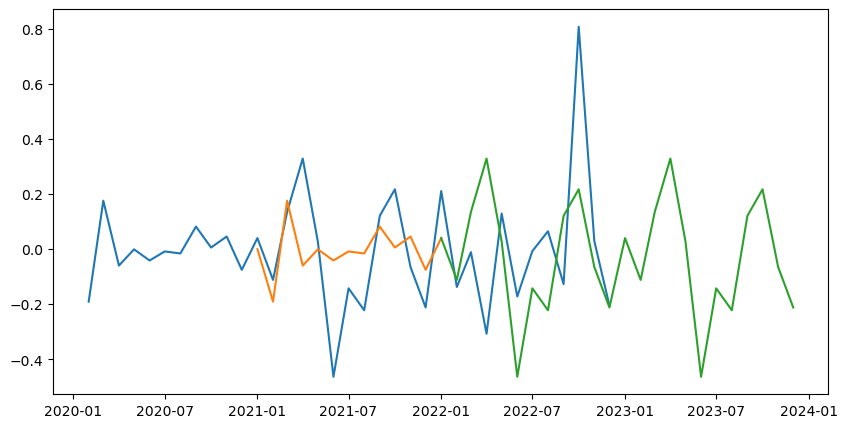

In [51]:
predict_future()

#### 2. Generates the MAPE and RMSE of your prediction of the year 2022, 2021 & 2020 for the given parameters.

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [53]:
def  predict_future(Laptop_Desktop='Desktop_Website', Place_in_India='Bengaluru',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        dss=ds[(ds['Laptop/Desktop']==Laptop_Desktop) & (ds['Place_in_India']==Place_in_India) &
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
        dss=dss.reset_index(drop=True)
        dss=dss[dss.columns[dss.columns.isin(['Date','Level 4'])]]
        dss.set_index("Date", inplace = True)
        dss['LogSales'] = np.log(dss['Level 4'])
        dss['log_diff']=dss['LogSales'].diff()
        dss=dss.dropna()
        Ntest = 12
        train = dss.iloc[:-Ntest]
        test = dss.iloc[-Ntest:]
        import pmdarima as pm
        model = pm.auto_arima(train['log_diff'],
                        trace=True,
                        suppress_warnings=True,
                        seasonal=True, m=12)
        train_pred = model.predict_in_sample(start=11, end=23)
        test_pred = model.predict(n_periods=24)
        train_pred=train_pred[:-1]
        dftr=train_pred.to_frame(name='Forecast')
        dftr=dftr.replace(dftr['Forecast'][0], dss['LogSales'][-1])
        dftr['Forecast']=dftr['Forecast'].cumsum()
        dftr['Forecast']=np.exp(dftr['Forecast'])
        mape_2020=mean_absolute_percentage_error(dftr['Forecast'], dss['Level 4'][11:23])
        rmse_2020=np.sqrt(mean_squared_error(dftr['Forecast'], dss['Level 4'][11:23]))
        test_pred=test_pred[:12]
        dfte=test_pred.to_frame(name='Forecast')
        dfte=dfte.replace(dfte['Forecast'][0], dss['LogSales'][-1])
        dfte['Forecast']=dfte['Forecast'].cumsum()
        dfte['Forecast']=np.exp(dfte['Forecast'])
        rmse_2021=np.sqrt(mean_squared_error(dfte['Forecast'], dss['Level 4'][-12:]))
        mape_2021=mean_absolute_percentage_error(dfte['Forecast'], dss['Level 4'][-12:])
    finally:
        print('Mean absolute percentage error for 2020 is:', mape_2020)
        print('Mean absolute percentage error for 2021 is:', mape_2021)
        print('Root mean squared error for 2020 is:', rmse_2020)
        print('Root mean squared error for 2021 is:', rmse_2021)

In [54]:
predict_future()

<IPython.core.display.Javascript object>

C:\Users\owner\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (11) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic


C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=0.470, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4.351, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4.215, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1.333, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2.470, Time=0.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2.470, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=4.470, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2.356, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2.215, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2.127, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.671 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute percentage error for 2020 is: 0.2285784540701524
Mean absolute percentage error for 2021 is: 0.3107465043922679
Root mean squared error for 2020 is: 4462.667468181607
Root mean squared error for 2021 is: 5872.525433642393


#### 3. Plot a line graph of the level 4 actual numbers from 2020-2022 & in the same graph, there should be the predicted numbers for 2023. The x-axis should be the timeline from 2020 Jan to 2023 Dec and the y-axis should be the value of the level 4 column

In [55]:
def  predict_future(Laptop_Desktop='Desktop_Website', Place_in_India='Bengaluru',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        dss=ds[(ds['Laptop/Desktop']==Laptop_Desktop) & (ds['Place_in_India']==Place_in_India) &
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
        dss=dss.reset_index(drop=True)
        dss=dss[dss.columns[dss.columns.isin(['Date','Level 4'])]]
        dss.set_index("Date", inplace = True)
        dss['LogSales'] = np.log(dss['Level 4'])
        dss['log_diff']=dss['LogSales'].diff()
        dss=dss.dropna()
        Ntest = 12
        train = dss.iloc[:-Ntest]
        test = dss.iloc[-Ntest:]
        import pmdarima as pm
        model = pm.auto_arima(train['log_diff'],
                        trace=True,
                        suppress_warnings=True,
                        seasonal=True, m=12)
        train_pred = model.predict_in_sample(start=11, end=23)
        test_pred = model.predict(n_periods=24)
        fore=test_pred[-13:]
        dff=fore.to_frame(name='Forecast')
        dff=dff.replace(dff['Forecast'][0], dss['LogSales'][-1])
        dff=dff[:-1]
        dff['Forecast']=dff['Forecast'].cumsum()
        dff['Forecast']=np.exp(dff['Forecast'])
    finally:
        return plt.figure(figsize=(10,5)), plt.plot(dss.index, dss['Level 4'], label='actual'), \
    plt.plot(dff.index[-13:], dff['Forecast'][-13:], label='forecast')

<IPython.core.display.Javascript object>

Performing stepwise search to minimize aic


C:\Users\owner\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (11) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=0.470, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4.351, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4.215, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1.333, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2.470, Time=0.12 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2.470, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=4.470, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2.356, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2.215, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2.127, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.652 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(<Figure size 1000x500 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x12a4b89fe80>])

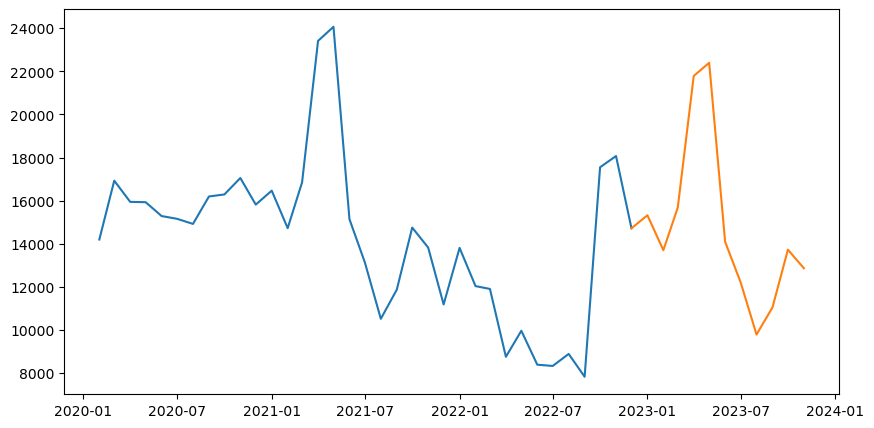

In [56]:
predict_future()

#### 4. Considering “Level 4”, which places in India would do better in 2023 w.r.t 2022 ? 

In this, I will compare the maximum values from year 2022 and 2023 

In [57]:
cities=['Indore','Pune','Hyderabad','Bengaluru','Dehradun']

**For 2022:**

In [58]:
for city in cities:
    print({city}, np.max(ds[(ds['Laptop/Desktop']=='Desktop_Website') & (ds['Type_of_Customers?']=='Existing_Customer') & 
   (ds['Coming from']=='From LinkedIn') & (ds['Year']==2022) & (ds['Place_in_India']==city)]['Level 4']))

<IPython.core.display.Javascript object>

{'Indore'} 91266


<IPython.core.display.Javascript object>

{'Pune'} 42130


<IPython.core.display.Javascript object>

{'Hyderabad'} 91754


<IPython.core.display.Javascript object>

{'Bengaluru'} 18070


<IPython.core.display.Javascript object>

{'Dehradun'} 33534


**For 2023:**

In [59]:
def  predict_future(Laptop_Desktop='Desktop_Website', Place_in_India='Bengaluru',
                       Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn'):
    try:
        dss=ds[(ds['Laptop/Desktop']==Laptop_Desktop) & (ds['Place_in_India']==Place_in_India) &
              (ds['Type_of_Customers?']==Type_of_Customers) & (ds['Coming from']==Coming_from)]
        dss=dss.reset_index(drop=True)
        dss=dss[dss.columns[dss.columns.isin(['Date','Level 4'])]]
        dss.set_index("Date", inplace = True)
        dss['LogSales'] = np.log(dss['Level 4'])
        dss['log_diff']=dss['LogSales'].diff()
        dss=dss.dropna()
        Ntest = 12
        train = dss.iloc[:-Ntest]
        test = dss.iloc[-Ntest:]
        import pmdarima as pm
        model = pm.auto_arima(train['log_diff'],
                        trace=True,
                        suppress_warnings=True,
                        seasonal=True, m=12)
        train_pred = model.predict_in_sample(start=11, end=23)
        test_pred = model.predict(n_periods=24)
        fore=test_pred[-13:]
        dff=fore.to_frame(name='Forecast')
        dff=dff.replace(dff['Forecast'][0], dss['LogSales'][-1])
        dff=dff[:-1]
        dff['Forecast']=dff['Forecast'].cumsum()
        dff['Forecast']=np.exp(dff['Forecast'])
    finally:
        return dff

In [60]:
np.max(predict_future(Place_in_India='Pune'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Performing stepwise search to minimize aic


C:\Users\owner\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (11) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2.903, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4.649, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=0.908, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=4.903, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=4.903, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=6.903, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4.090, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2.649, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=4.457, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.544 seconds


<IPython.core.display.Javascript object>

C:\Users\owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Forecast    61558.772365
dtype: float64

In [61]:
np.max(predict_future())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Performing stepwise search to minimize aic


C:\Users\owner\anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (11) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=0.470, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4.351, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4.215, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1.333, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2.470, Time=0.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2.470, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=4.470, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2.356, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2.215, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2.127, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.662 seconds


<IPython.core.display.Javascript object>

C:\Users\owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Forecast    22395.257208
dtype: float64

# <p style="text-align: center;">_Part 5: Visualization_</p>

#### 1. A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021.

In [62]:
dates=('1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020',
       '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020',
       '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021',
       '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021')

In [63]:
p=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Pune') & (ds['month_year']==date)]['Level 2'].sum()
    p.append(sum)

In [64]:
h=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Hyderabad') & (ds['month_year']==date)]['Level 2'].sum()
    h.append(sum)

In [65]:
d=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Dehradun') & (ds['month_year']==date)]['Level 2'].sum()
    d.append(sum)

In [66]:
i=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Indore') & (ds['month_year']==date)]['Level 2'].sum()
    i.append(sum)

In [67]:
b=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Bengaluru') & (ds['month_year']==date)]['Level 2'].sum()
    b.append(sum)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

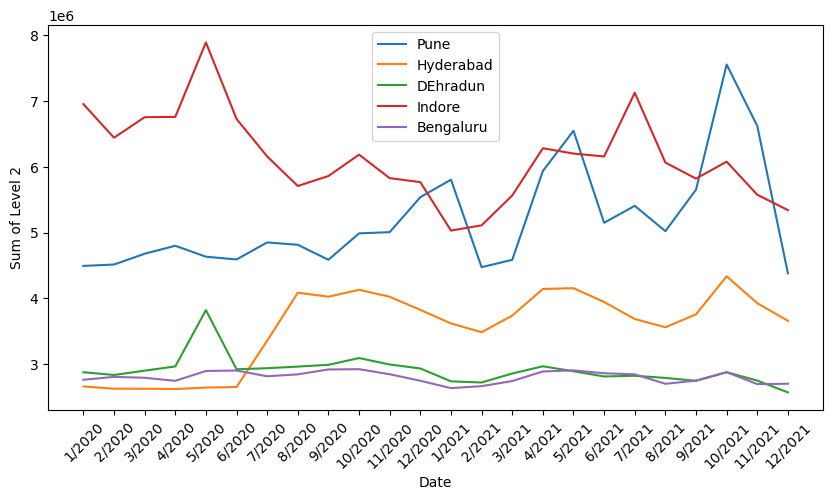

In [68]:
plt.figure(figsize=(10,5))
plt.plot(dates,p, label='Pune')
plt.plot(dates,h, label='Hyderabad')
plt.plot(dates,d, label='DEhradun')
plt.plot(dates,i, label='Indore')
plt.plot(dates,b, label='Bengaluru')
plt.xlabel('Date')
plt.ylabel('Sum of Level 2')
plt.xticks(rotation=45)
plt.legend()

#### 2. A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. 

In [69]:
dates=('1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020',
       '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020',
       '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021',
       '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021')

In [70]:
list=[]
for date in dates:
    sum=ds[(ds['Laptop/Desktop']=='Desktop_Website') & (ds['month_year']==date)]['Level 1'].sum()
    list.append(sum)

In [71]:
list1=[]
for date in dates:
    sum=ds[(ds['Laptop/Desktop']=='Laptop_Website') & (ds['month_year']==date)]['Level 1'].sum()
    list1.append(sum)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

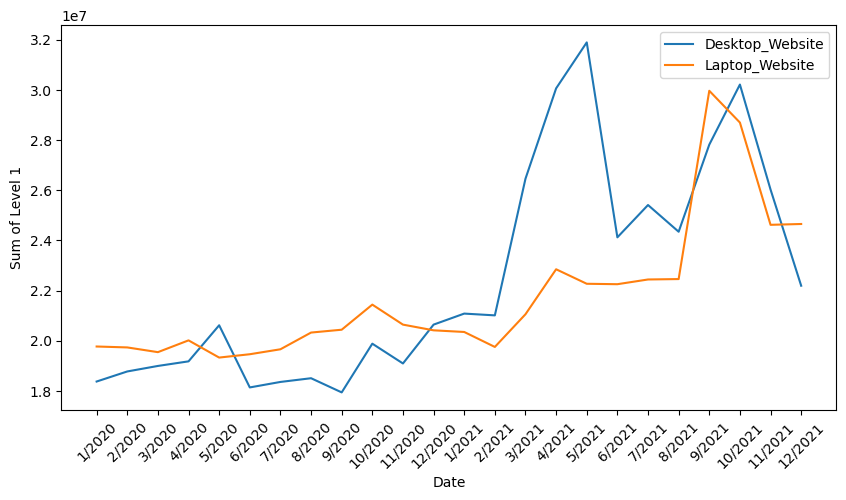

In [72]:
plt.figure(figsize=(10,5))
plt.plot(dates, list, label='Desktop_Website')
plt.plot(dates, list1, label='Laptop_Website')
plt.xlabel('Date')
plt.ylabel('Sum of Level 1')
plt.xticks(rotation=45)
plt.legend()

#### 3. A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022

In [73]:
dates=('1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021',
       '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021',
       '1/2022', '2/2022', '3/2022', '4/2022', '5/2022', '6/2022',
       '7/2022', '8/2022', '9/2022', '10/2022', '11/2022', '12/2022')

In [74]:
list=[]
for date in dates:
    sum=ds[(ds['Coming from']=='From LinkedIn') & (ds['month_year']==date)]['Level 2'].sum()
    list.append(sum)

In [75]:
ds['Coming from'].unique()

array(['From LinkedIn', 'Direct_traffic', 'Unidentified_Sources'],
      dtype=object)

In [76]:
list1=[]
for date in dates:
    sum=ds[(ds['Coming from']=='Direct_traffic') & (ds['month_year']==date)]['Level 2'].sum()
    list1.append(sum)

In [77]:
list2=[]
for date in dates:
    sum=ds[(ds['Coming from']=='Unidentified_Sources') & (ds['month_year']==date)]['Level 2'].sum()
    list2.append(sum)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

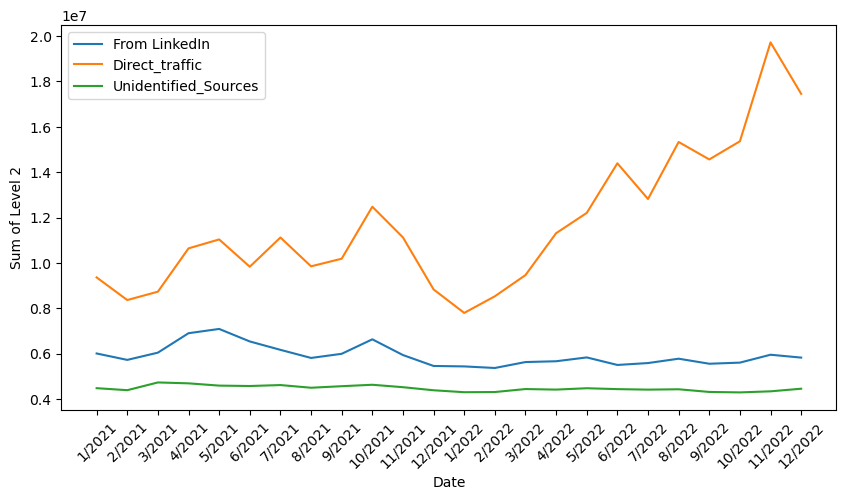

In [78]:
plt.figure(figsize=(10,5))
plt.plot(dates,list, label='From LinkedIn')
plt.plot(dates,list1, label='Direct_traffic')
plt.plot(dates,list2, label='Unidentified_Sources')
plt.xlabel('Date')
plt.ylabel('Sum of Level 2')
plt.xticks(rotation=45)
plt.legend()

#### 4. A line graph for “Level 1”, “Level 4”  and “inc/dec percentage” columns over the months of the year 2020, 2021 & 2022

In [79]:
ds['inc/dec percentage']=data_cleaning(ds['Level 1'],ds['Level 4'])

In [80]:
ds.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,month_year,Date,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,1/2020,2020-01-01,97.808566
1,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,1/2020,2020-01-01,98.479850
2,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,1/2020,2020-01-01,97.517319
3,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Indore,783870.222017,358215.416281,320923,110667,1/2020,2020-01-01,85.881974
4,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Pune,783870.222017,358215.416281,220937,46033,1/2020,2020-01-01,94.127472


In [81]:
dates=('1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020',
       '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020',
       '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021',
       '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021',
       '1/2022', '2/2022', '3/2022', '4/2022', '5/2022', '6/2022',
       '7/2022', '8/2022', '9/2022', '10/2022', '11/2022', '12/2022')

In [82]:
l1=[]
for date in dates:
    sum=ds[ds['month_year']==date]['Level 1'].sum()
    l1.append(sum)

In [83]:
l4=[]
for date in dates:
    sum=ds[ds['month_year']==date]['Level 4'].sum()
    l4.append(sum)

In [84]:
i_d=[]
for date in dates:
    sum=ds[ds['month_year']==date]['inc/dec percentage'].sum()
    i_d.append(sum)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

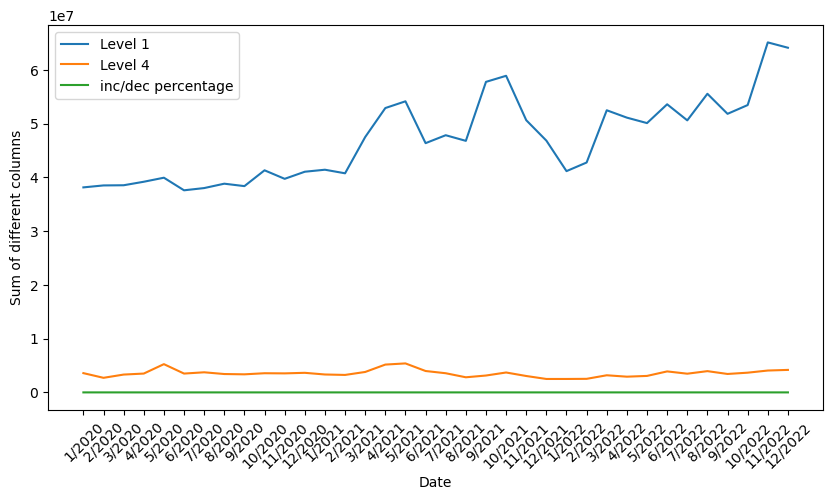

In [85]:
plt.figure(figsize=(10,5))
plt.plot(dates,l1, label='Level 1')
plt.plot(dates,l4, label='Level 4')
plt.plot(dates,i_d, label='inc/dec percentage')
plt.xlabel('Date')
plt.ylabel('Sum of different columns')
plt.xticks(rotation=45)
plt.legend()

#### 5. A line graph for “Level 3” and “Place_in_India” over the months of the year 2020 and 2021

In [86]:
dates=('1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020',
       '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020',
       '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021',
       '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

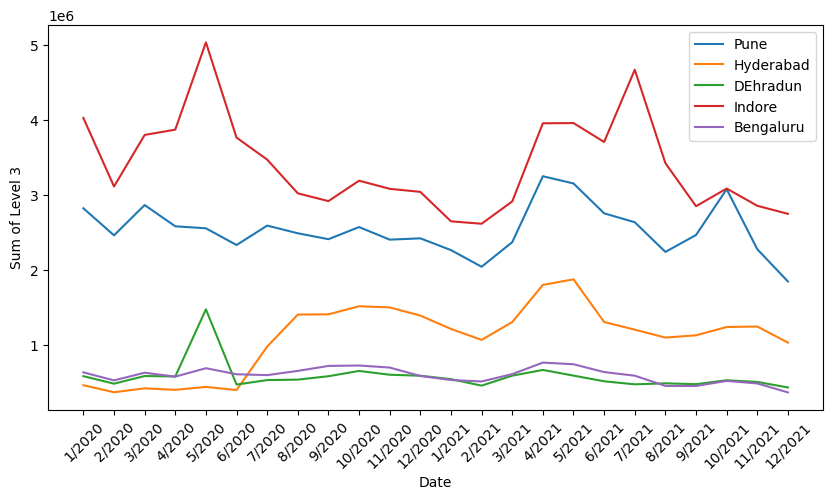

In [87]:
p=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Pune') & (ds['month_year']==date)]['Level 3'].sum()
    p.append(sum)

h=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Hyderabad') & (ds['month_year']==date)]['Level 3'].sum()
    h.append(sum)

d=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Dehradun') & (ds['month_year']==date)]['Level 3'].sum()
    d.append(sum)

i=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Indore') & (ds['month_year']==date)]['Level 3'].sum()
    i.append(sum)

b=[]
for date in dates:
    sum=ds[(ds['Place_in_India']=='Bengaluru') & (ds['month_year']==date)]['Level 3'].sum()
    b.append(sum)

plt.figure(figsize=(10,5))
plt.plot(dates,p, label='Pune')
plt.plot(dates,h, label='Hyderabad')
plt.plot(dates,d, label='DEhradun')
plt.plot(dates,i, label='Indore')
plt.plot(dates,b, label='Bengaluru')
plt.xlabel('Date')
plt.ylabel('Sum of Level 3')
plt.xticks(rotation=45)
plt.legend()

#### 6. A well visualized bar graph showing the “Level 1” from various places in India , also, representing the type of customers, for the year 2022

In [88]:
ds=ds[ds['Year']==2022]
ds=ds.drop(columns=['Year', 'Month','Date','inc/dec percentage'])

df=ds.drop(columns=['Level 2','Level 3','Level 4'])

df.head()

,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,month_year
1440,Desktop_Website,Existing_Customer,From LinkedIn,Bengaluru,783870.222017,1/2022
1441,Desktop_Website,Existing_Customer,From LinkedIn,Hyderabad,783870.222017,1/2022
1442,Desktop_Website,Existing_Customer,From LinkedIn,Dehradun,783870.222017,1/2022
1443,Desktop_Website,Existing_Customer,From LinkedIn,Indore,783870.222017,1/2022
1444,Desktop_Website,Existing_Customer,From LinkedIn,Pune,783870.222017,1/2022


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='month_year', ylabel='Level 1'>

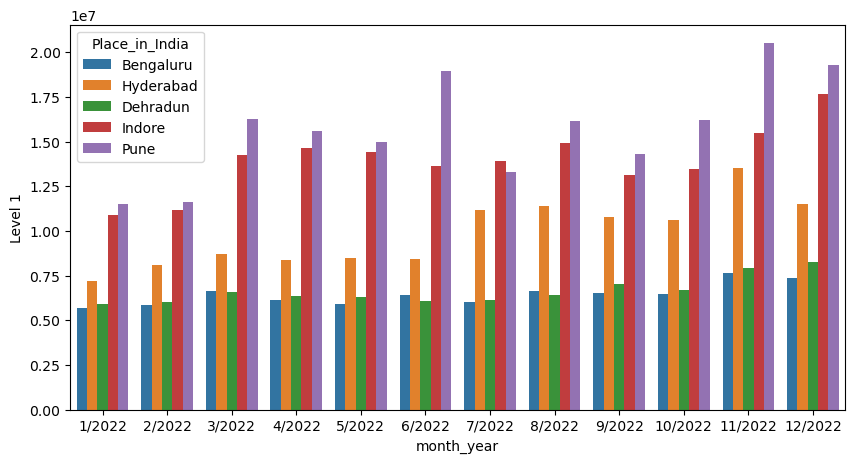

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='month_year', y='Level 1', hue='Place_in_India', ci=0,  estimator = np.sum)

# <p style="text-align: center;">_Part 6: About the Previous projects_</p>

I have worked on computer vision projects and EDA from youtube, kaggle, etc. [My github link](https://github.com/skk06/TF-developer-certificate)  

[My Portfolio](https://skk06.github.io/PIAI22NOV2009.github.io/)

# <p style="text-align: center;">_Part 7: Time management_</p>

I will be able to depute time for the internship by managing time for different activities